In [2]:
%pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/88/d6/ebc199ba1fd99719c8680b3fb90663aa4888871364c69bbf9629148b9724/prophet-1.1.4-py3-none-win_amd64.whl.metadata
     ---------------------------------------- 0.0/83.2 kB ? eta -:--:--
     ---------------------------------------- 83.2/83.2 kB 4.9 MB/s eta 0:00:00
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/e0/7e/9d3b9387ac87500ae215da875660d219f7734e0dbe9437898a7388f0855c/holidays-0.32-py3-none-any.whl.metadata
  Using cached holidays-0.32-py3-none-any.whl.metadata (16 kB)
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/25/d4/592f53ce2f8dde8be5720851bd0ab71cc2e76c55978e4163ef1ab7e389bb/importlib_resources-6.0.1-py3-none-any.whl.metadata
  Using cached PyMeeus-0.5.12

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [5]:
df = pd.read_csv('Walmart Data Analysis and Forcasting.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df.rename(
    columns={"Date":"ds", "Weekly_Sales":"y"}, 
    inplace=True
)



In [10]:
# convert Date to datetime
df["ds"] = pd.to_datetime(df["ds"])

In [11]:
df

,Store,ds,y,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [12]:
# subset to just one store
df = df.loc[df["Store"] == 2]
# drop not needed columns
col_to_drop = ["Store", "Holiday_Flag"]
walmart_data = df.drop(col_to_drop, axis=1)

In [13]:
#show description
walmart_data.describe()

,y,Temperature,Fuel_Price,CPI,Unemployment
count,1.430000e+02,143.000000,143.000000,143.000000,143.000000
mean,1.925751e+06,68.216364,3.219699,215.646311,7.623846
std,2.376837e+05,15.492766,0.427313,4.342286,0.615414
min,1.650394e+06,33.020000,2.514000,209.998458,6.170000
25%,1.803501e+06,56.735000,2.764500,211.206435,7.057000
50%,1.879107e+06,69.210000,3.290000,215.109666,7.931000
75%,1.956927e+06,81.940000,3.594000,220.170572,8.099000
max,3.436008e+06,93.340000,3.907000,223.078337,8.324000


In [14]:
walmart_data.dtypes

ds              datetime64[ns]
y                      float64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [19]:
# group by ds and get median values for each day across the stores
walmart_data_agg = pd.DataFrame(
    walmart_data.groupby("ds").quantile(0.5)
).reset_index()
# sort date values
walmart_data_agg.sort_values("ds", inplace=True)
walmart_data_agg

,ds,y,Temperature,Fuel_Price,CPI,Unemployment
0,2010-01-10,1827440.43,69.24,2.603,211.329874,8.163
1,2010-02-04,2066187.72,63.27,2.719,210.479887,8.200
2,2010-02-07,2003940.64,82.74,2.669,210.880373,8.099
3,2010-02-19,2124451.54,39.69,2.514,210.945160,8.324
4,2010-02-26,1865097.27,46.10,2.561,210.975957,8.324
...,...,...,...,...,...,...
138,2012-10-08,1866719.96,88.55,3.494,221.595414,6.565
139,2012-10-19,1847990.41,68.08,3.594,223.059808,6.170
140,2012-10-26,1834458.35,69.79,3.506,223.078337,6.170
141,2012-11-05,1917520.99,73.87,3.688,221.363221,6.891


In [20]:
# reset the index
walmart_data_agg.reset_index(inplace=True)
walmart_data_agg

,index,ds,y,Temperature,Fuel_Price,CPI,Unemployment
0,0,2010-01-10,1827440.43,69.24,2.603,211.329874,8.163
1,1,2010-02-04,2066187.72,63.27,2.719,210.479887,8.200
2,2,2010-02-07,2003940.64,82.74,2.669,210.880373,8.099
3,3,2010-02-19,2124451.54,39.69,2.514,210.945160,8.324
4,4,2010-02-26,1865097.27,46.10,2.561,210.975957,8.324
...,...,...,...,...,...,...,...
138,138,2012-10-08,1866719.96,88.55,3.494,221.595414,6.565
139,139,2012-10-19,1847990.41,68.08,3.594,223.059808,6.170
140,140,2012-10-26,1834458.35,69.79,3.506,223.078337,6.170
141,141,2012-11-05,1917520.99,73.87,3.688,221.363221,6.891


In [16]:
# train test split
cutoff = int(np.floor(len(walmart_data_agg) * 0.85))
train = walmart_data_agg.iloc[:cutoff, :]
test = walmart_data_agg[~walmart_data_agg.index.isin(train.index)]

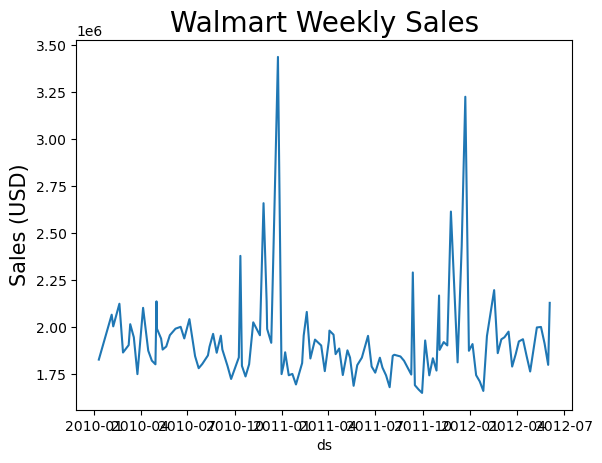

In [21]:
# visualize training data
train_plt = sns.lineplot(
    data=train, x="ds", y="y"
);
train_plt.set_title("Walmart Weekly Sales", size=20)
train_plt.set_ylabel("Sales (USD)", size=15);


In [22]:
# plot options
sns.set(style="whitegrid", rc={"figure.figsize": (15, 8)})

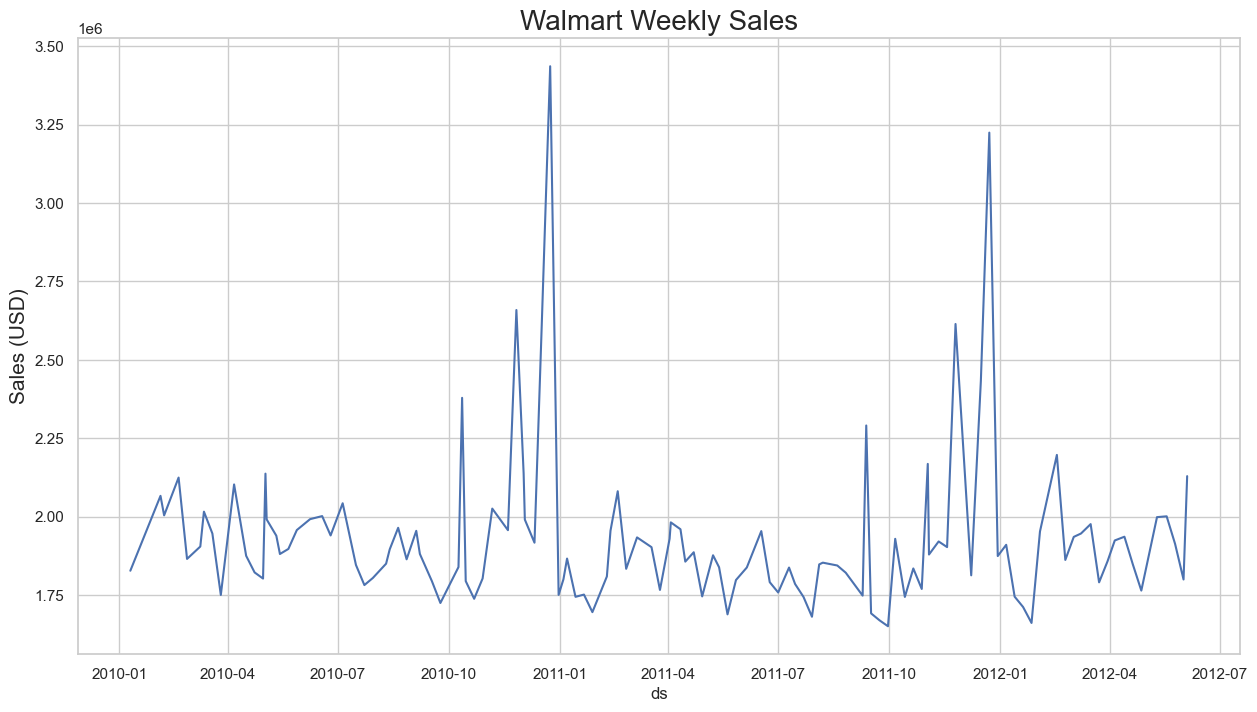

In [23]:
# visualize training data
train_plt = sns.lineplot(
    data=train, x="ds", y="y"
);
train_plt.set_title("Walmart Weekly Sales", size=20)
train_plt.set_ylabel("Sales (USD)", size=15);

In [24]:
# Make model class
model = Prophet()

# add regressors to reg component
regressors_to_add = [
    "Temperature", 
    "Fuel_Price",
    "CPI",
    "Unemployment", 
]
[model.add_regressor(reg) for reg in regressors_to_add]

# fit the model with the training data
model.fit(train)

# Use the test as an example 
forecast = model.predict(test) 

13:10:16 - cmdstanpy - INFO - Chain [1] start processing
13:10:16 - cmdstanpy - INFO - Chain [1] done processing


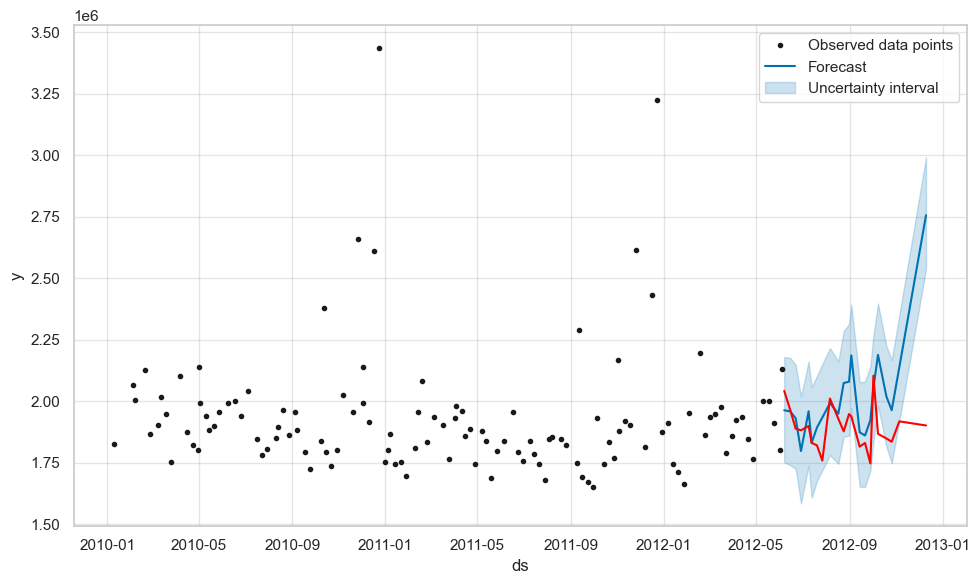

In [25]:
model.plot(forecast);
sns.lineplot(
    data=test,
    x="ds",
    y="y",
    color="red"
)
plt.show()

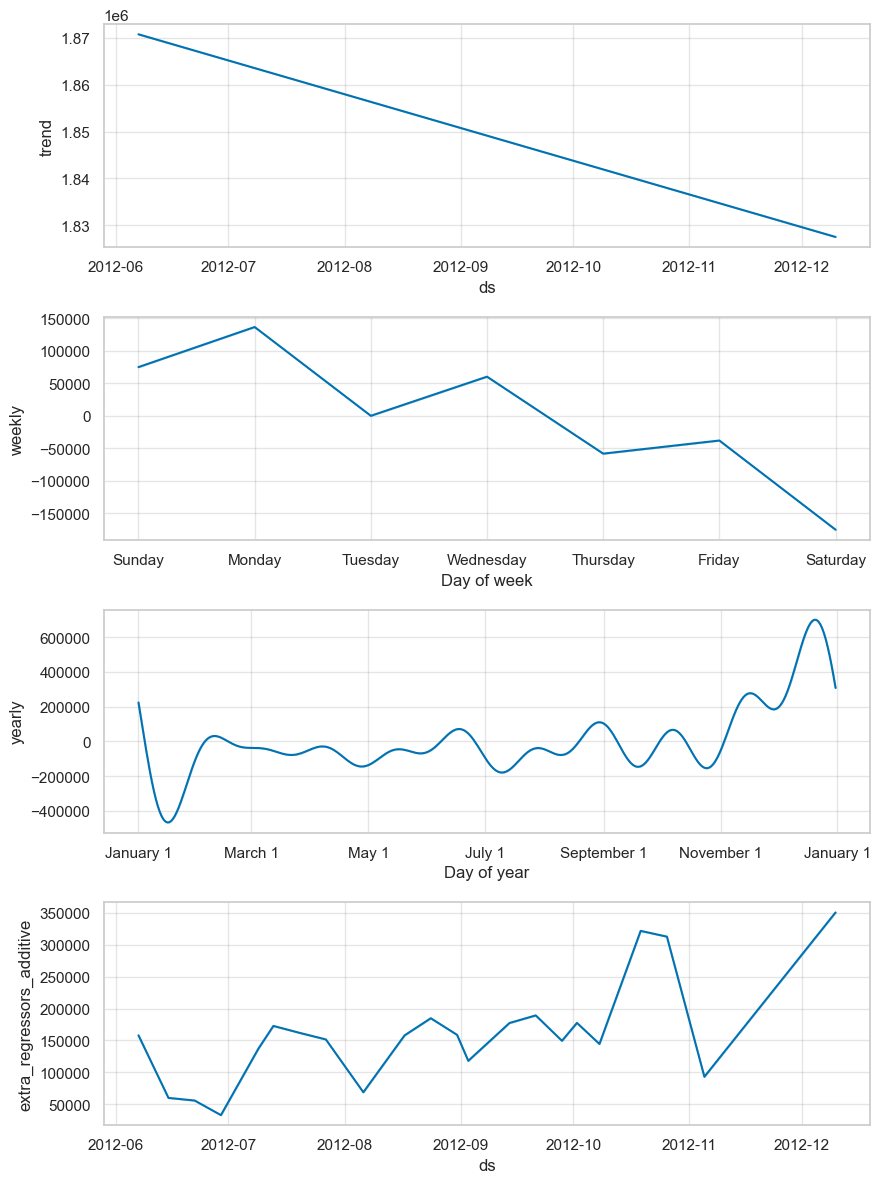

In [26]:
model.plot_components(forecast);

In [ ]:
predictions = 